# REGRESSION

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
%config IPCompleter.greedy=False

# To read data from diamonds.csv
import pandas as pd
import random
import time
from sklearn.preprocessing import OrdinalEncoder
from tabulate import tabulate
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import math
from pprint import pprint
import statistics
from matplotlib import pyplot as plt
from scipy import stats

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('Regression_Diamonds_data/diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


### About the dataset:

1. We have both categorical and numerical data 
2. For columns cut,color and clarity we have categorical data



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

# Data Preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carat    53940 non-null  object
 1   cut      53940 non-null  object
 2   color    53940 non-null  object
 3   clarity  53940 non-null  object
 4   depth    53940 non-null  object
 5   table    53940 non-null  object
 6   price    53940 non-null  object
 7   x        53940 non-null  object
 8   y        53940 non-null  object
 9   z        53940 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


### Observations:

1. As the non null values in all columns are same. We can say there are no null values in the given data set
2. Price is the target value, that has to be predicted

### Check for categorical data and convert to numerical values

In [3]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [5]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Data Preparation

Now as the categorical data is converted into numerical, we can continue training the data

In [6]:


# enc = OrdinalEncoder()
cut_mapper = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_mapper = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
clarity_mapper = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
# enc.fit(X)
data['cut'] = data['cut'].replace(cut_mapper)
data['color'] = data['color'].replace(color_mapper)
data['clarity'] = data['clarity'].replace(clarity_mapper)



keys = ["carat","depth","price","table","x","y","z"]
index_non_categorical = [0,4,5,6,6,7,8]
for x in keys:
    data[x] = [float(item) for item in data[x]]

# **Linear Regression**


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


As depth is a column which is dependent of x,y and z. We don't need to use that as it can be derived from the coefficients of the columns x,y and z

In [33]:
def hypothesis(theta,X,constant):
    return constant + (np.dot(X,theta.T))

def cost_function(theta,X,y,m,constant):
    d = np.sum((hypothesis(theta,X,constant)-y)**2)
    d/=(2*m)
    return d

def gradient_descent(theta,X,y,m,epochs,alpha,constant):
    i = 0
    cost = []
    while i<epochs:
        h = hypothesis(theta,X,constant)
        z = h - y
        constant = constant - ((alpha)*(np.sum(z)))/m
        theta = theta - ((alpha)*(np.sum(np.dot(X.T,z),axis=0)))/m
        cost.append(cost_function(theta,X,y,m,constant))
        i+=1
    return theta,cost,constant


def predict(X,y,test):
    m = len(X)

    temp = 0.005
    theta = np.repeat(temp,len(X[0]))
    
    aplha = 0.00005
    epochs = 10000
    
    theta,cost,constant = gradient_descent(theta,X,y,m,10,0.01,0.0000001)
    y_predict = hypothesis(theta,test,constant)
    return (y_predict)



y_predict_LR = predict(X_train,y_train,X_test)

error = r_squared(y_predict_LR,y_test)

display_error(y_predict_LR,y_test)

MSE:  130098736.68409386
MAE:  10655.156363198716
r_score: 0.0036858653638780913


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

The best suitable features are the one which are highly correlated with the price(column to be predicted). So we can filter them by using the corr() function and then deduce the columns

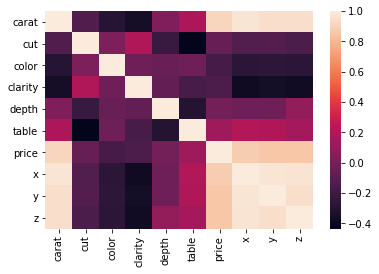

In [21]:
#code for Correlation between features and the Diamond Price.
def plot_graph(corr):
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

corr = data.corr()
plot_graph(corr)


columns = np.full((corr.shape[0],), True, dtype=bool)


for i in range(0, corr.shape[0]):
    if(abs(corr.iloc[i,6])<0.2):
        columns[i] = False
                
selected_columns = data.columns[columns]

##### Observations:

We conclude that two columns are closely related if the correlation value between them is near to (+1 or -1)
Here the columns carat,x,y and z are closely related to the column price. which is the value we have to predict

In [22]:
## Let us run the algorithm by only considering the columns which are closely related to price

X = data[selected_columns]
y = data['price']

from sklearn.model_selection import train_test_split
X_train_correlation, X_test_correlation, y_train_correlation, y_test_correlation = train_test_split(X, y, test_size = 0.2, random_state = 0)


X_train_correlation = X_train_correlation.to_numpy()
X_test_correlation = X_test_correlation.to_numpy()
y_train_correlation = y_train_correlation.to_numpy()
y_test_correlation = y_test_correlation.to_numpy()

In [23]:
y_predict_correlation = predict(X_train_correlation,y_train_correlation,X_test_correlation)
display_error(y_predict_correlation,y_test_correlation)

MSE = mean_square_error(y_predict_correlation,y_test_correlation)
MAE = mean_absolute_error(y_predict_correlation,y_test_correlation)
R2_score = r_squared(y_predict_correlation,y_test_correlation)
scores2 = [MSE,MAE,R2_score]

MSE:  2.9655425443086803e+117
MAE:  3.8314863624980054e+58
r_score: 0.9999998548499477


##### Observation:

We can observe that by considering only closely related values we get more accuracy(r-squared value)

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [24]:
# import sklearn model

from sklearn.linear_model import LinearRegression 

regr = LinearRegression() 
  
regr.fit(X_train_correlation, y_train_correlation) 
y_predict = regr.predict(X_test_correlation) 
display_error(y_predict,y_test_correlation)

MSE:  3.319760798049055e-24
MAE:  1.4464932362353298e-12
r_score: 1.0


In [25]:
MSE = mean_square_error(y_predict_correlation,y_test_correlation)
MAE = mean_absolute_error(y_predict_correlation,y_test_correlation)
R2_score = r_squared(y_predict_correlation,y_test_correlation)
scores1 = [MSE,MAE,R2_score]

In [26]:
tabular_data=[["Implemented"]+scores2,["sklearn"]+scores1]
print(tabulate(tabular_data, headers=['Model','MSE','MAE','R2']))

Model                 MSE          MAE    R2
-----------  ------------  -----------  ----
Implemented  2.96554e+117  3.83149e+58     1
sklearn      2.96554e+117  3.83149e+58     1


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [27]:
regr.fit(X_train, y_train) 
y_predict = regr.predict(X_test) 
display_error(y_predict,y_test)

MSE:  2002297.6958848173
MAE:  957.0703249562245
r_score: 0.9089345519564922


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


In [28]:
score3 = [mean_square_error2, mean_absolute_error2, r_squared2]

tabular_data=[["Linear regression"]+scores2,["KNN regression"]+score3]
print(tabulate(tabular_data, headers=['Model','MSE','MAE','R2']))

Model                            MSE            MAE        R2
-----------------  -----------------  -------------  --------
Linear regression       2.96554e+117    3.83149e+58  1
KNN regression     839878             456.912        0.947759


Linear regression is a prametric approach beacuse it assumes a linear functional form of f(X) where as kNN is a non-parametric method.

Advantages of Linear regression here we only need to estimate a small number of coefiicients. Often easy to interpret. But it makes strong assumptions about the form of f(X). Suppose we assume a linear relationship between X and Y but the true relationship is far from lienar, then the resulting model will provide a poor fit to the data, and any conclusions drawn from it will be a suspect. 

When it comes to KNN it don't assume an explicit form for f(X), providing a more flexible approach. But this can often be more complex to understand and interpret. Also takes more time for computation. So called as lazy-learning algorithm.


If there are small number of observations per predictor, then linear regression method works better. 

But one advantage of KNN is that we don't have to train the data prior. So we keep on adding the data. 

For this particular example, I got more accuracy for linear regression. So I prefer that over KNN. We can choose which algorithm to proceed with before starting the implementation. If we are not satisfied with the results, we can always go with other algorithms. 

We have to make sure whatever the algorithm we are choosing, the data should be shaped so that it satisfies the assumptions made by the algorithm. 